<a href="https://colab.research.google.com/github/azaelnino15/Inteligencia-Artificial-y-Redes-Neuronales/blob/main/PIA/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTAR LIBRERIAS
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
#CARGAR DATOS
!pip install kaggle
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arturoni","key":"1216516ca847e99e02666fa976e5df4d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d lsind18/gemstones-images

Dataset URL: https://www.kaggle.com/datasets/lsind18/gemstones-images
License(s): other
 89% 49.0M/55.2M [00:00<00:00, 86.2MB/s]
100% 55.2M/55.2M [00:00<00:00, 85.4MB/s]


In [ ]:
import zipfile

# Ruta al archivo ZIP descargado
zip_file_path = '/content/gemstones-images.zip'

# Ruta a la carpeta donde deseas descomprimir el archivo
extracted_folder_path = '/content/Dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

In [ ]:
# Inicializar listas para almacenar las imágenes y etiquetas
imagenes_train = []
etiquetas_train = []
imagenes_test = []
etiquetas_test = []

In [ ]:
# Definir directorios
dataset_dir = '/content/Dataset'
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

# Tamaño al que se redimensionarán las imágenes
resize_dim = (128, 128)

# Función para procesar y reescalar imágenes
def procesar_imagenes(base_directory, image_list, label_list):
    for class_name in os.listdir(base_directory):
        class_dir = os.path.join(base_directory, class_name)
        if os.path.isdir(class_dir):
            for filepath in glob.iglob(f'{class_dir}/*.jpg'):
                image = cv2.imread(filepath, cv2.IMREAD_COLOR)
                img_resized = cv2.resize(image, resize_dim)
                image_list.append(img_resized)
                label_list.append(class_name)

# Procesar imágenes de entrenamiento
procesar_imagenes(train_dir, imagenes_train, etiquetas_train)

# Procesar imágenes de prueba
procesar_imagenes(test_dir, imagenes_test, etiquetas_test)

In [ ]:
#PREPROCESAMIENTO
# Convertir listas a arrays de NumPy
X_train = np.array(imagenes_train)
y_train = np.array(etiquetas_train)
X_test = np.array(imagenes_test)
y_test = np.array(etiquetas_test)

# Normalizar los valores de píxeles a un rango de 0 a 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convertir etiquetas a valores categóricos
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Convertir etiquetas a formato one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


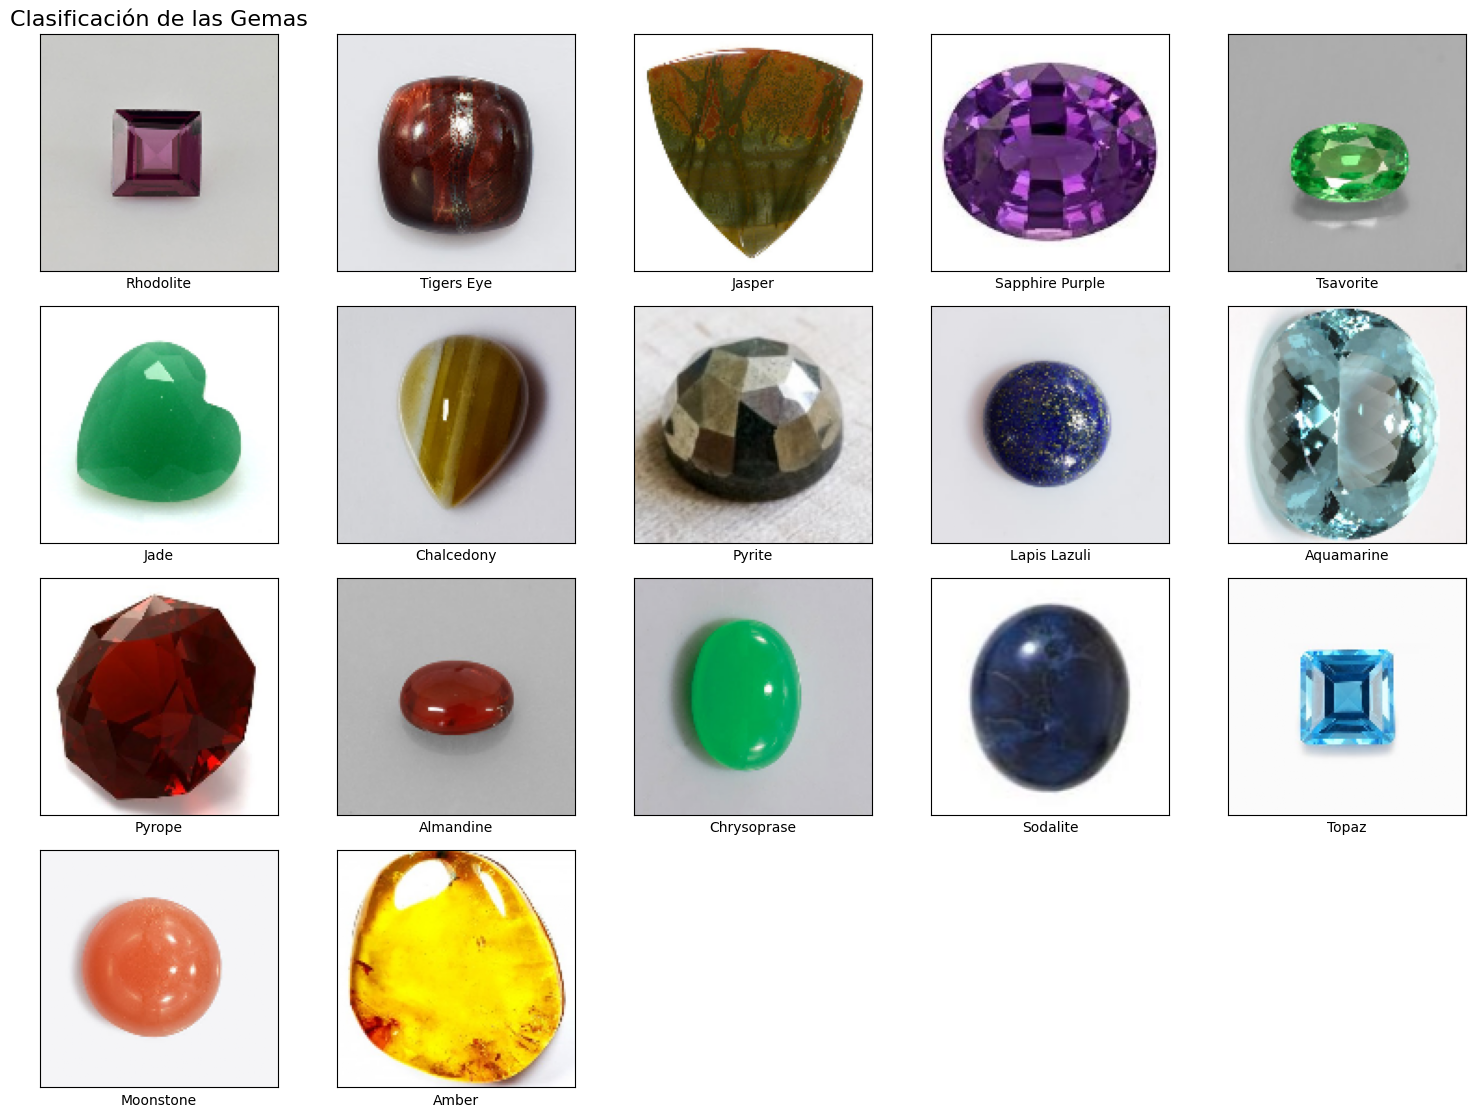

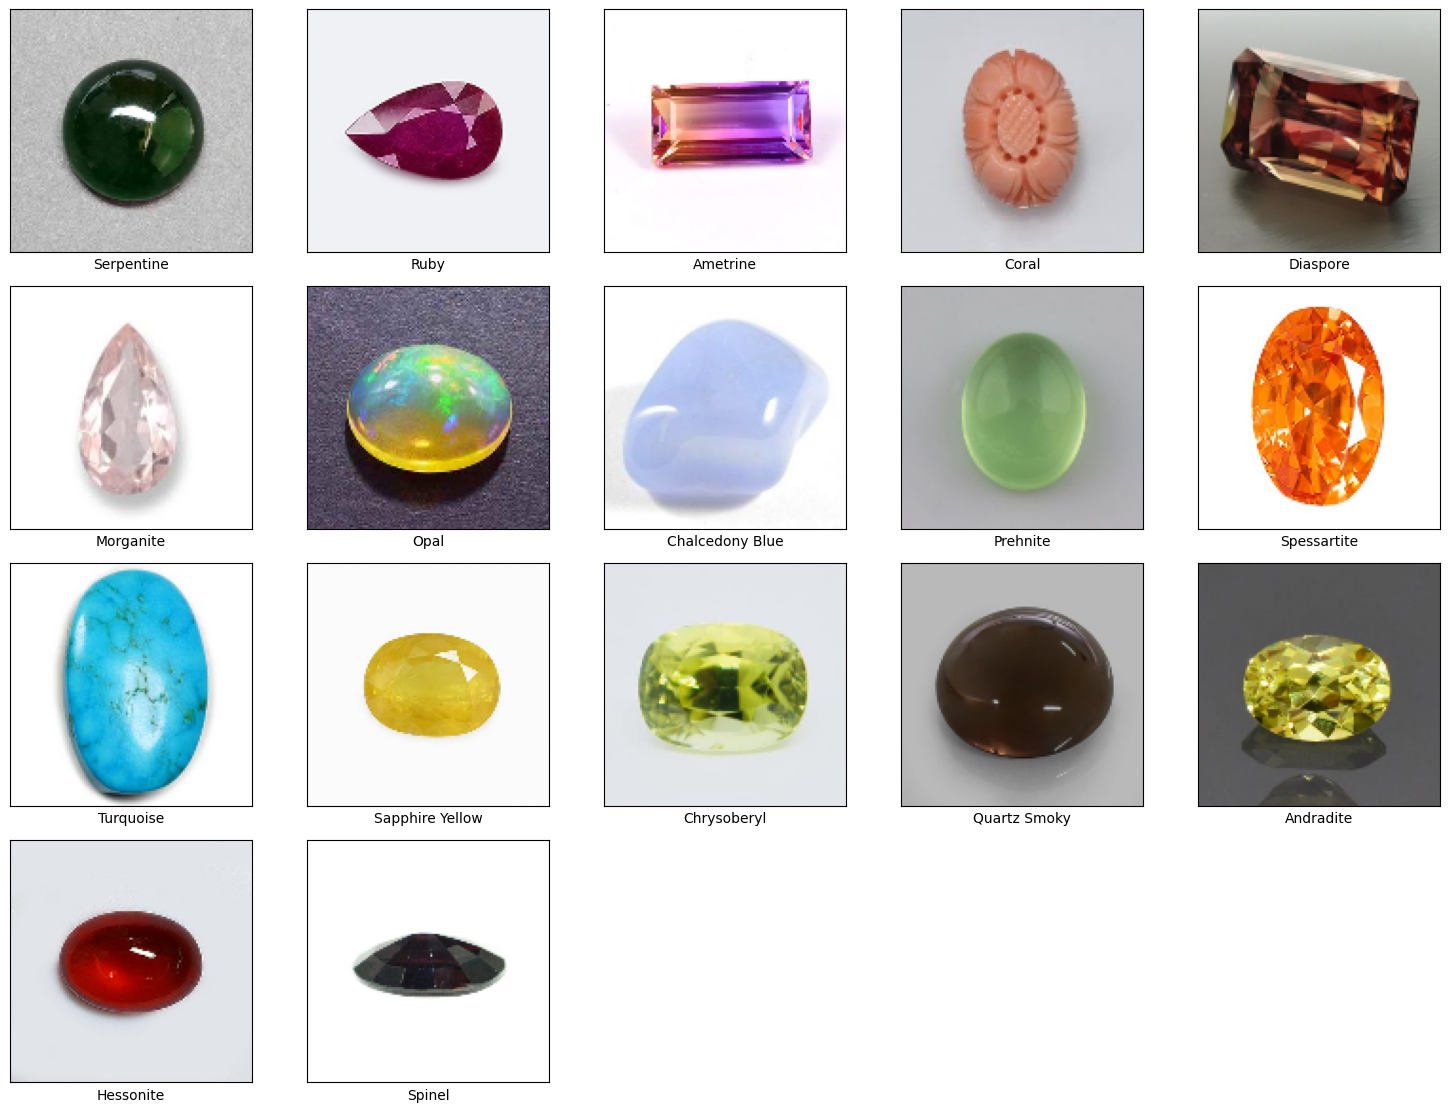

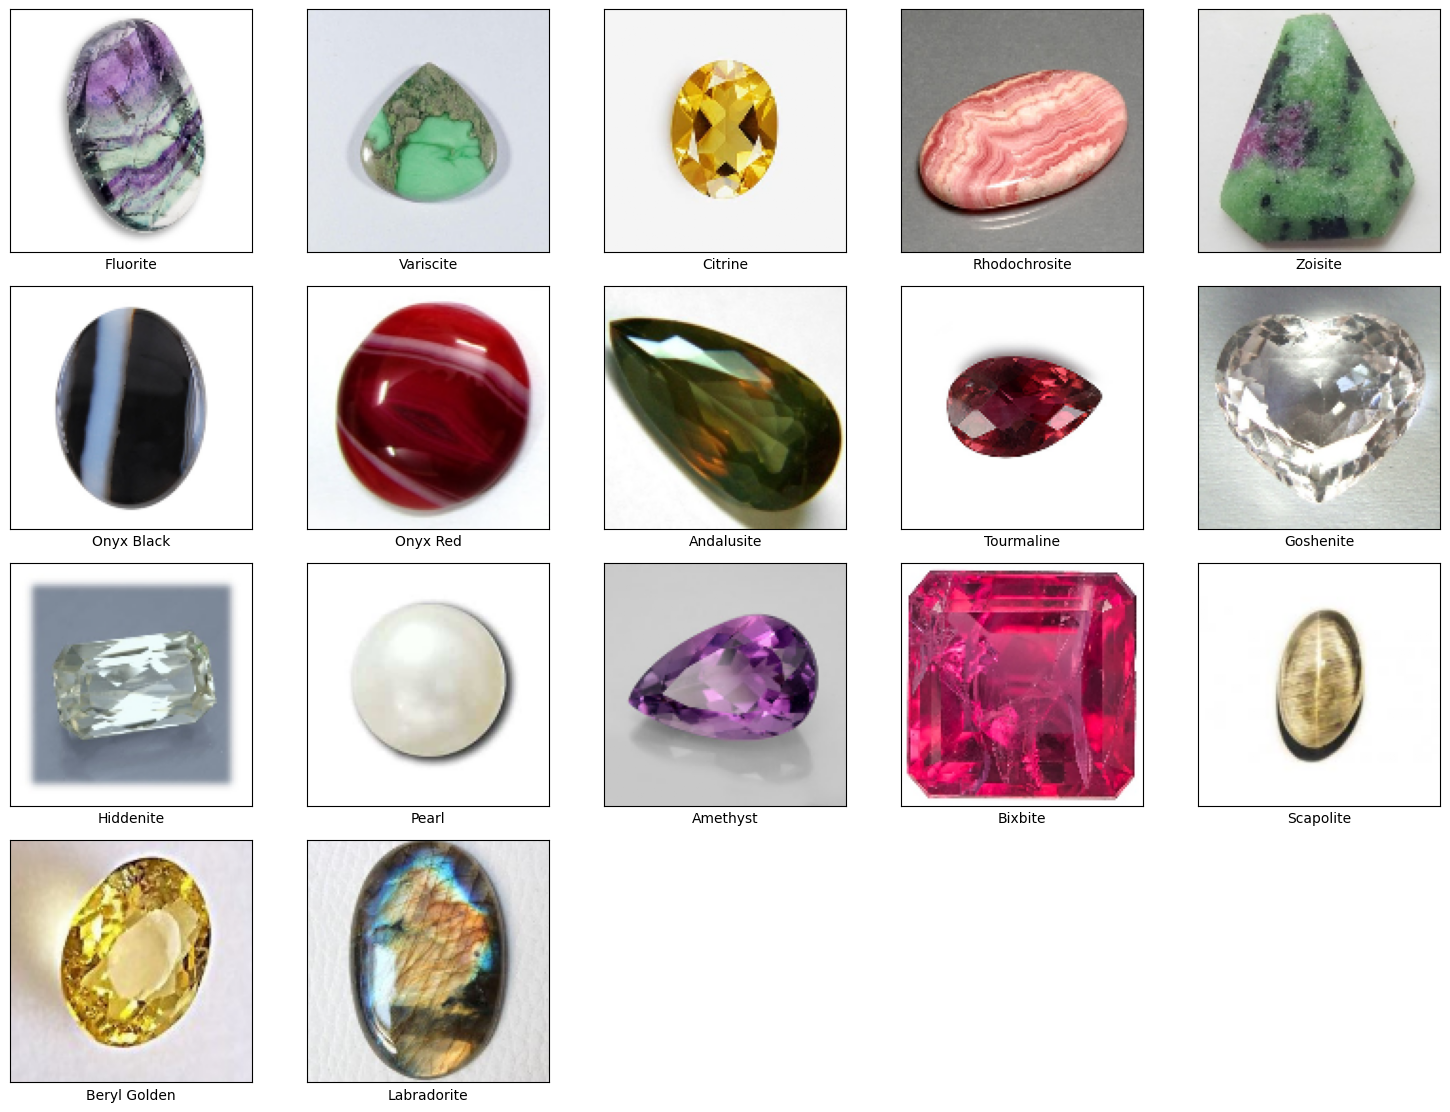

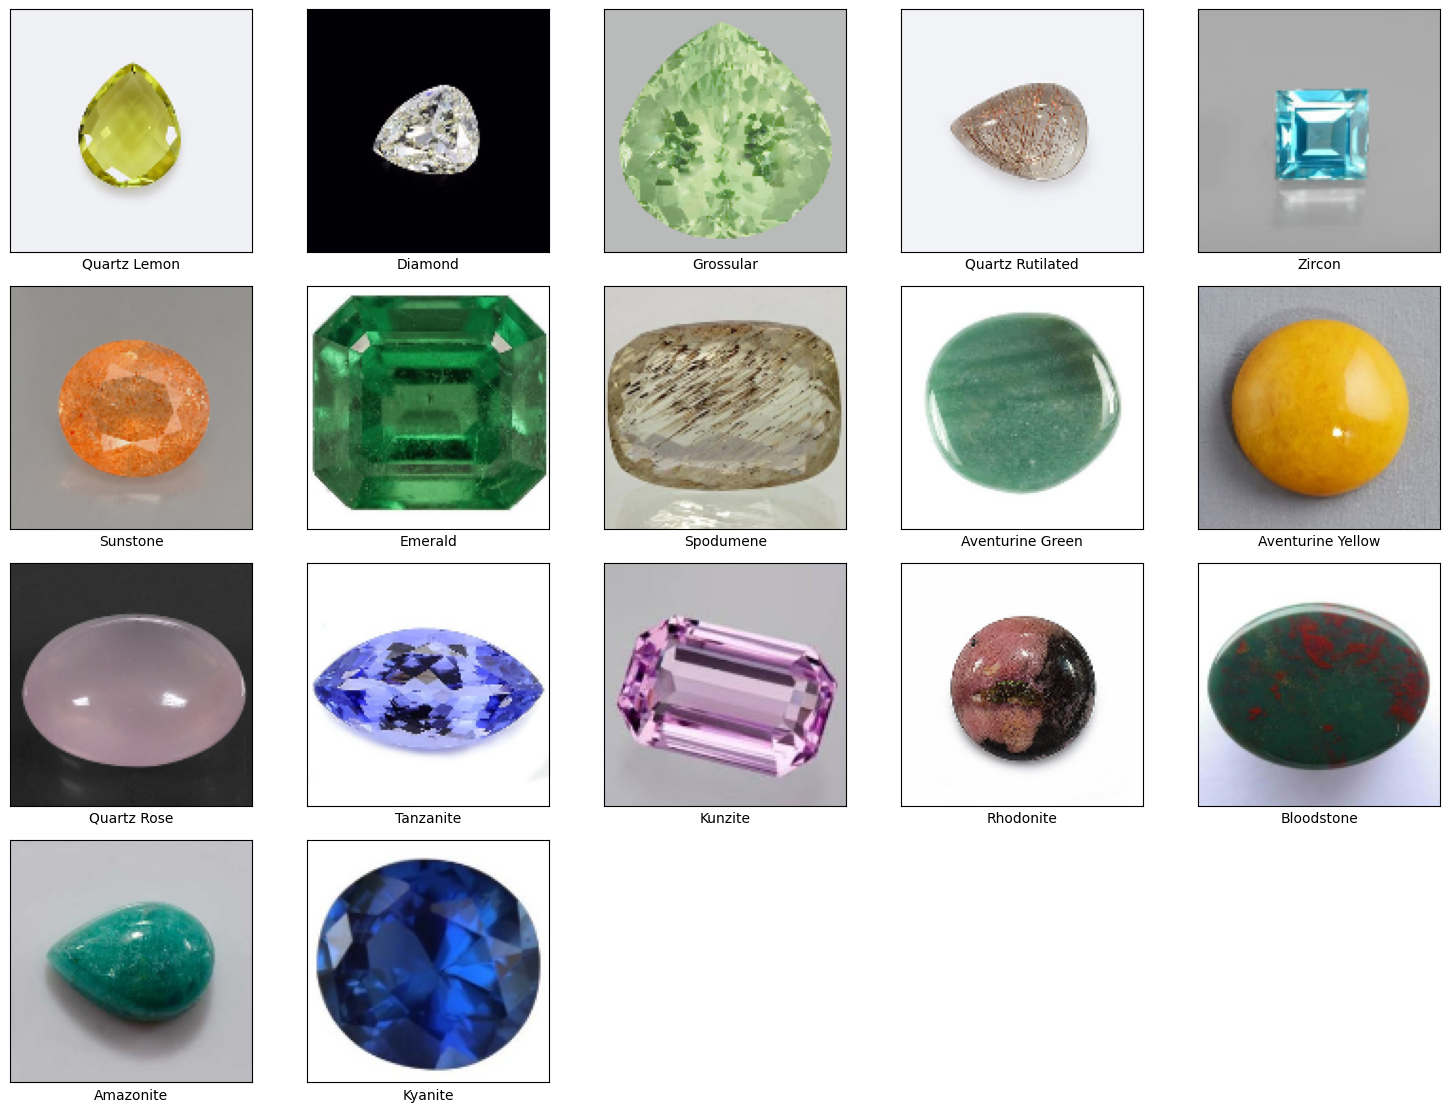

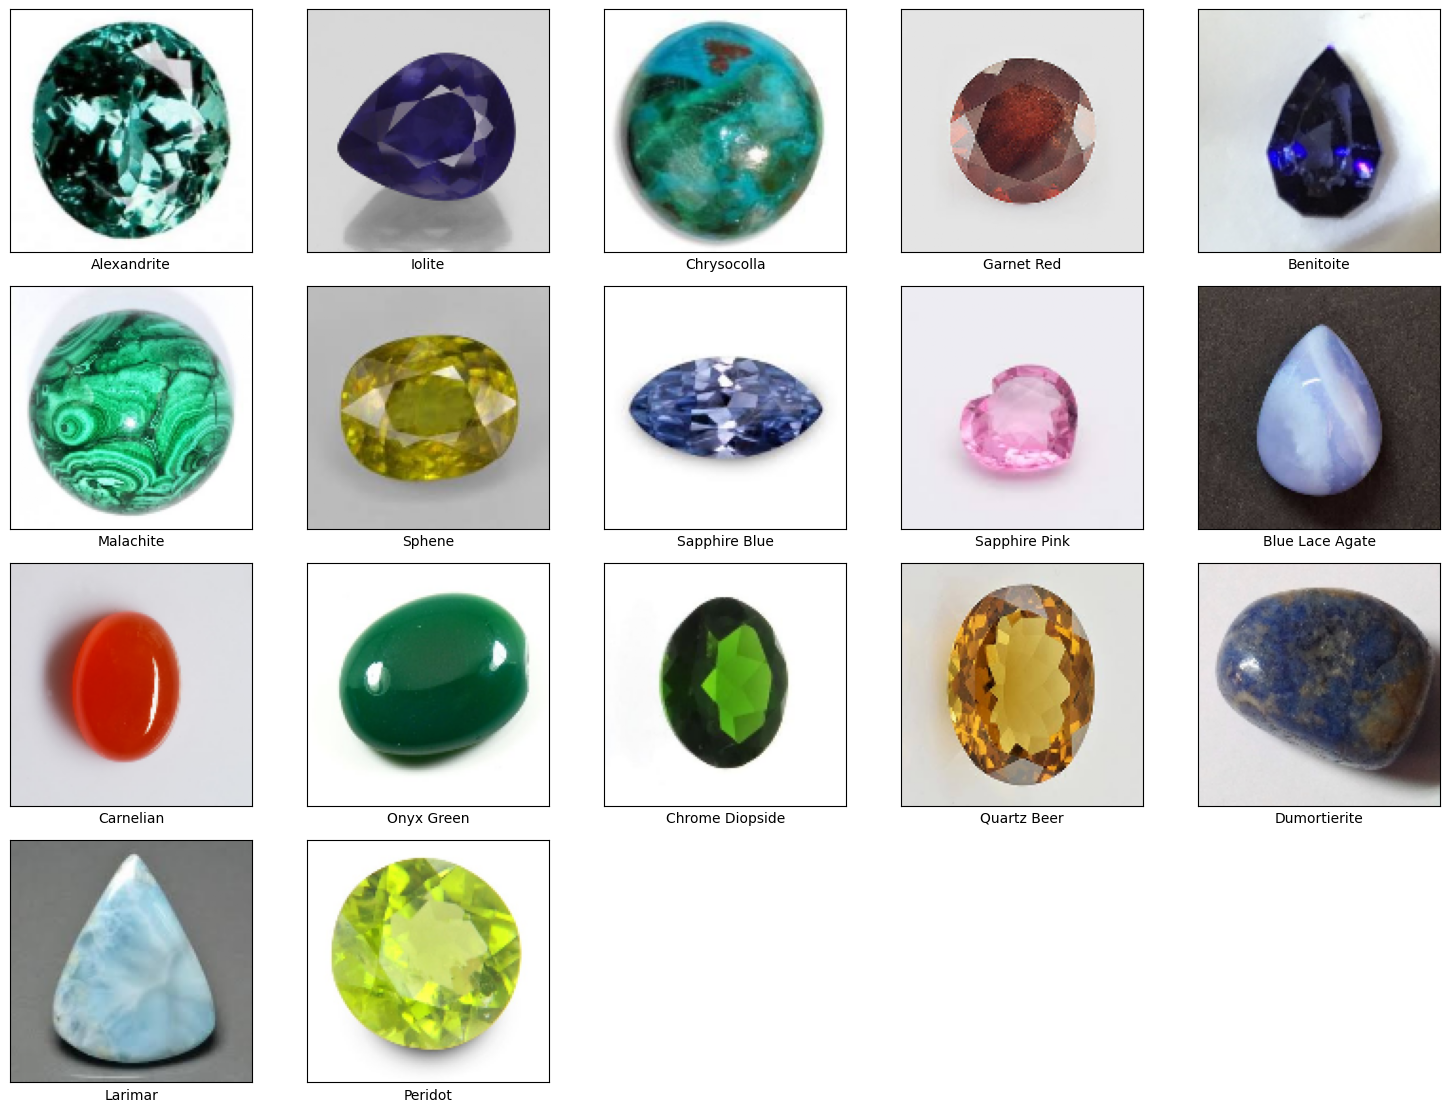

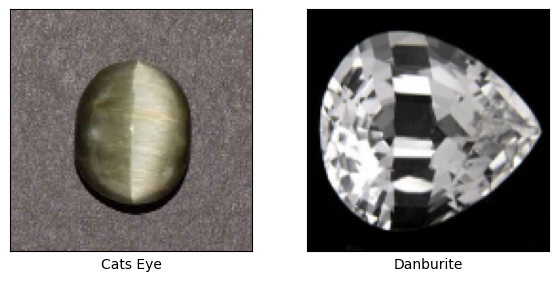

In [ ]:
# Crear un diccionario para almacenar la primera imagen de cada clase
class_names= {}
# Iterar sobre los datos de entrenamiento para encontrar la primera imagen de cada clase
for imagen, etiqueta in zip(X_train, etiquetas_train):
    if etiqueta not in class_names:
       class_names[etiqueta] = imagen

import math

# Dividir las clases en grupos de 17
num_grupos = math.ceil(len(class_names) / 17)

# Mostrar cada grupo de clases junto con la imagen que la representa
for grupo in range(num_grupos):
    plt.figure(figsize=(15,15))
    for i, (clase, imagen) in enumerate(list(class_names.items())[grupo*17:(grupo+1)*17]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
        plt.xlabel(clase)  # Usamos el nombre de la clase como etiqueta


        if grupo == 0 and i == 0:
            plt.title("Clasificación de las Gemas", fontsize=16,)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar el espacio entre subgráficos y título
    plt.show()

In [ ]:
#ENTRENAMIENTO DEL MODELO
model = Sequential()

# Primera capa de convolución
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

# Segunda capa de convolución
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Tercera capa de convolución
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten y capas densas
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(etiquetas_train)), activation='softmax'))  # Número de clases

# Compilar el modelo
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Mostrar el resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
90/90 [==============================] - 101s 1s/step - loss: 1.3362 - accuracy: 0.5749 - val_loss: 1.8104 - val_accuracy: 0.4931
Epoch 2/20
90/90 [==============================] - 95s 1s/step - loss: 1.2934 - accuracy: 0.5886 - val_loss: 1.7504 - val_accuracy: 0.4959
Epoch 3/20
90/90 [==============================] - 94s 1s/step - loss: 1.1585 - accuracy: 0.6254 - val_loss: 1.8281 - val_accuracy: 0.4876
Epoch 4/20
90/90 [==============================] - 95s 1s/step - loss: 1.0683 - accuracy: 0.6467 - val_loss: 1.6975 - val_accuracy: 0.4931
Epoch 5/20
90/90 [==============================] - 91s 1s/step - loss: 0.9584 - accuracy: 0.6814 - val_loss: 1.8003 - val_accuracy: 0.5399
Epoch 6/20
90/90 [==============================] - 93s 1s/step - loss: 0.9443 - accuracy: 0.6849 - val_loss: 1.7482 - val_accuracy: 0.5207
Epoch 7/20
90/90 [==============================] - 91s 1s/step - loss: 0.9244 - accuracy: 0.6926 - val_loss: 1.7671 - val_accuracy: 0.5014
Epoch 8/20
90/90 [=

12/12 [==============================] - 6s 479ms/step - loss: 2.4873 - accuracy: 0.5179
Pérdida en el conjunto de prueba: 2.4872565269470215
Precisión en el conjunto de prueba: 0.5179063081741333


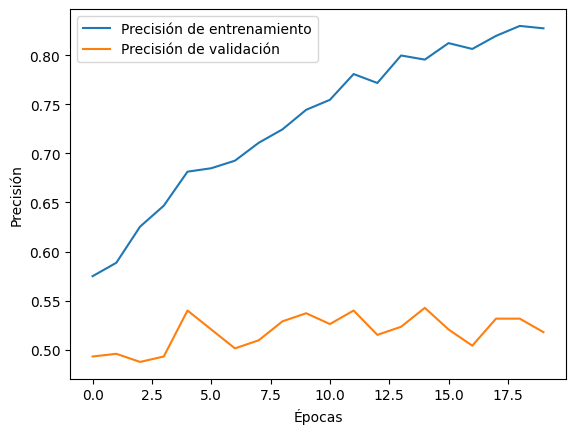

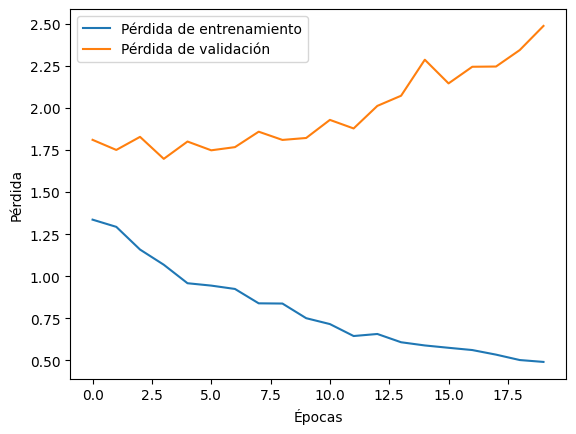

In [ ]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')
print(f'Precisión en el conjunto de prueba: {accuracy}')

# Graficar la precisión y la pérdida a lo largo de las épocas
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [ ]:
# Evaluar el modelo en el conjunto de datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)

# Calcular el porcentaje de precisión
precision_porcentaje = accuracy * 100

# Mostrar el porcentaje de precisión
print(f'Porcentaje de precisión: {precision_porcentaje}%')

12/12 [==============================] - 3s 243ms/step - loss: 2.4873 - accuracy: 0.5179
Porcentaje de precisión: 51.79063081741333%
